<a href="https://colab.research.google.com/github/Dev1503/Stock_Price/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df=pd.read_csv("/content/ADANIPORTS.csv")
df['Date']=pd.to_datetime(df['Date'])
df.set_index(["Date"],inplace=True)

In [5]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [6]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [7]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


<Axes: xlabel='Date'>

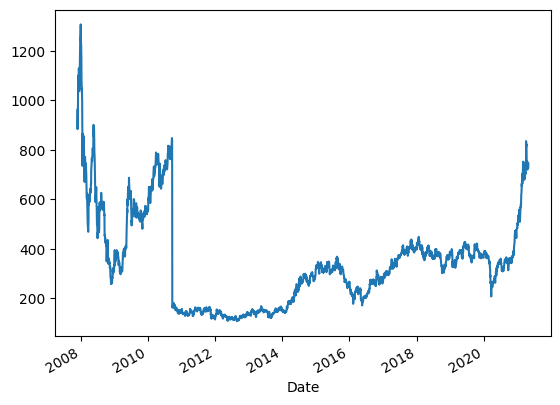

In [8]:
df["Close"].plot()

In [9]:
df.shape

(3322, 14)

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


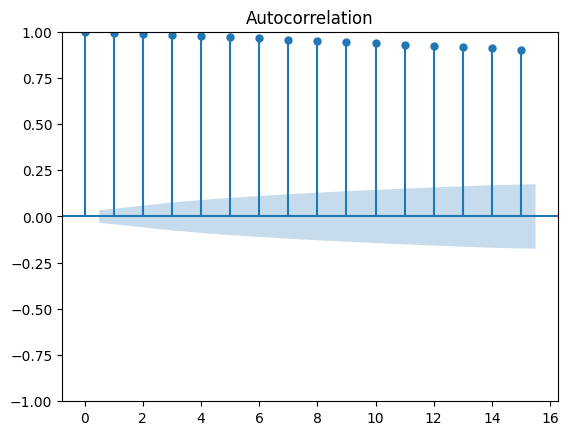

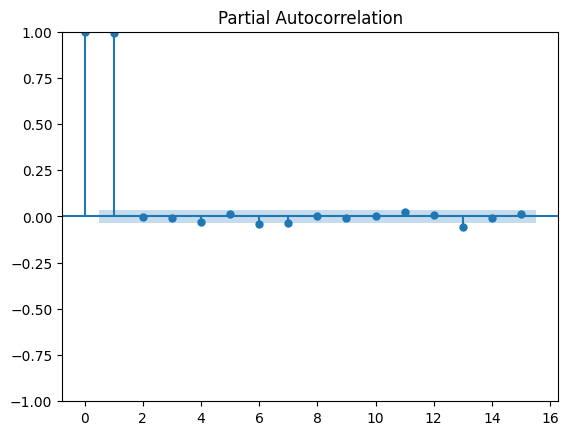

In [11]:
## ACF and PACF
plot_acf(df['Close'],lags = 15);
plot_pacf(df['Close'],lags = 15);

### Dickey-FullerTest

In [12]:
from statsmodels.tsa.stattools import adfuller


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(series):
    result=adfuller(series)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print(" Data is non-stationary ")

In [13]:
def stationary_sqrt_transform(series):
    df_log=np.sqrt(series)
    df_diff=df_log.diff().dropna()
    print(adfuller_test(df_diff))
    return df_diff
df_diff = stationary_sqrt_transform(df['Close'])

ADF Test Statistic : -56.52339272370356
p-value : 0.0
Lags Used : 0
Number of Observations Used : 3320
Data is stationary
None


## Auto Regressive Model

Train Data Size =  4413
Test Data Size =  490
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 4413
Model:                     AutoReg(4)   Log Likelihood              -17863.421
Method:               Conditional MLE   S.D. of innovations             13.910
Date:                Sun, 09 Apr 2023   AIC                          35738.841
Time:                        07:38:31   BIC                          35777.190
Sample:                    12-01-2007   HQIC                         35752.368
                         - 12-26-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1124      0.418      2.659      0.008       0.293       1.932
Close.L1       1.0224      0.015     67.954      0.000       0.993       1.052
Close.

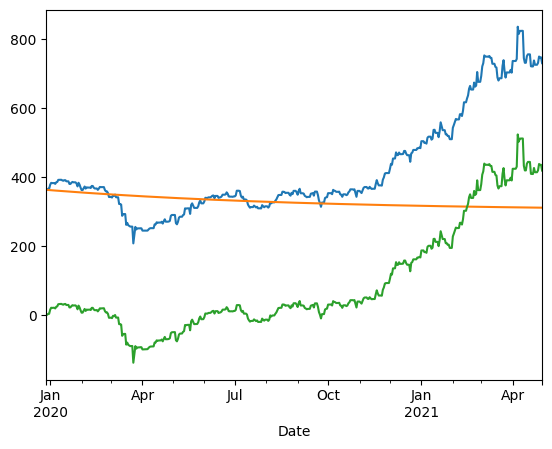

In [14]:
from statsmodels.tsa.ar_model import AutoReg,AutoRegResults,ar_select_order
def build_AR_model(ser,lag):
    #SETTING THE FREQUENCY BY INFERRING FROM THE DATA ITSELF
    ser = ser.asfreq(pd.infer_freq(df.index))
    ser = ser.fillna(method="ffill")
    
    train_data = ser.iloc[:int(ser.shape[0]*.9)]
    print("Train Data Size = ",train_data.shape[0])
    test_data = ser.iloc[int(ser.shape[0]*.9) + 1:]
    print("Test Data Size = ",test_data.shape[0])

    model = AutoReg(train_data, lags=lag)
    
    
    model_fit = model.fit()
    
    
    print(model_fit.summary())

    #Prediction Start and End Date
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    print("From ",pred_start_date)
    print("To ",pred_end_date)

    predictions = model_fit.predict(start = pred_start_date,end = pred_end_date)
    residuals = test_data - predictions

    print("Mean Absolute Percent Error = ",round(np.mean(abs(residuals/test_data)),4))
    print("Root Mean Squared Error = ",np.sqrt(np.mean(residuals**2)))
    
    return test_data,predictions,residuals
test_data,predictions,residuals = build_AR_model(df['Close'],4)

test_data.plot()
predictions.plot()

plt.plot(residuals)

## Moving Average Model

Train Data Size =  4413
Test Data Size =  490


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4413
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -24515.617
Date:                Sun, 09 Apr 2023   AIC                          49039.233
Time:                        07:38:40   BIC                          49064.803
Sample:                    11-27-2007   HQIC                         49048.252
                         - 12-26-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.3345      3.636     92.220      0.000     328.208     342.461
ma.L1          1.5569      0.004    440.727      0.000       1.550       1.564
ma.L2          0.8413      0.004    231.913      0.0

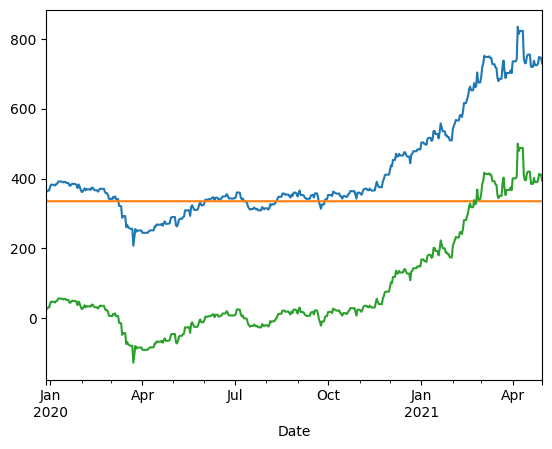

In [15]:
def build_MA_model(ser,lag):
    #SETTING THE FREQUENCY BY INFERRING FROM THE DATA ITSELF
    ser = ser.asfreq(pd.infer_freq(df.index))
    ser = ser.fillna(method="ffill")
    
    train_data = ser.iloc[:int(ser.shape[0]*.9)]
    print("Train Data Size = ",train_data.shape[0])
    test_data = ser.iloc[int(ser.shape[0]*.9) + 1:]
    print("Test Data Size = ",test_data.shape[0])

    model = sm.tsa.arima.ARIMA(train_data, order=(0,0,2))
    
   
    model_fit = model.fit()
    
    
    print(model_fit.summary())

    #Prediction Start and End Date
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    print("From ",pred_start_date)
    print("To ",pred_end_date)

    predictions = model_fit.predict(start = pred_start_date,end = pred_end_date)
    residuals = test_data - predictions

    print("Mean Absolute Percent Error = ",round(np.mean(abs(residuals/test_data)),4))
    print("Root Mean Squared Error = ",np.sqrt(np.mean(residuals**2)))
    
    return test_data,predictions,residuals#create the model
test_data,predictions,residuals = build_MA_model(df['Close'],4)
test_data.plot()
predictions.plot()

plt.plot(residuals)
